Берем датасет sklearn.datasets.boston, делим его на трэйн и тест выборку (удобно это делать функцией sklearn.model_selection.train_test_split) в отношении 70 на 30. 


In [46]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

#print(a.data)

a = datasets.load_boston()

X = a.data     #data
y = a.target   #class

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)
print(len(X_train) / (len(X_train)+len(X_test)))



0.6996047430830039


На тренировочной части учим линейную регрессию

In [47]:
from sklearn.linear_model import LinearRegression
lrc = LinearRegression().fit(X_train, y_train) 
resultLinear = lrc.predict(X_test)


случайный лес для регрессии с 30 деревьями (обе модели есть в sklearn). 


In [48]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(max_depth=3, n_estimators=30).fit(X_train, y_train)
resultTree = rfc.predict(X_test)

Сравниваем результаты по метрике MAE (есть в sklearn). 

В документаци есть такая строчка

**MAE output is non-negative floating point. The best value is 0.0.**

Поэтому случайный лес лучше

In [49]:
from sklearn.metrics import mean_absolute_error

maeLin = mean_absolute_error(y_test, resultLinear)
maeTree = mean_absolute_error(y_test, resultTree)
print(maeLin, maeTree)

3.0531873764598654 2.355824461883274


В случайном лесе есть возможность посмотреть важность признаков, выведете ее.

**как следует из рисунка ниже 12 фича имеет наивысшую важность. Судя по feature_names первые 3 места по важности распределились так:**

1 - LSTAT

2 - RM

3 - DIS

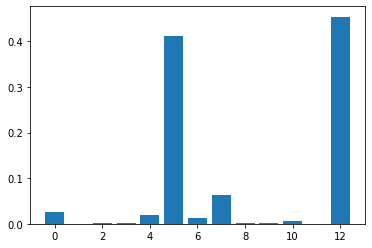

Feature:  0       CRIM, Score: 0.02675
Feature:  1         ZN, Score: 0.00000
Feature:  2      INDUS, Score: 0.00087
Feature:  3       CHAS, Score: 0.00256
Feature:  4        NOX, Score: 0.01853
Feature:  5         RM, Score: 0.41140
Feature:  6        AGE, Score: 0.01204
Feature:  7        DIS, Score: 0.06315
Feature:  8        RAD, Score: 0.00126
Feature:  9        TAX, Score: 0.00185
Feature: 10    PTRATIO, Score: 0.00675
Feature: 11          B, Score: 0.00049
Feature: 12      LSTAT, Score: 0.45436


In [50]:
import matplotlib.pyplot as plt

importance = rfr.feature_importances_

plt.bar([x for x in range(len(importance))], importance)
plt.show()

for i,v in enumerate(importance):
	print('Feature: %2d %10s, Score: %.5f' % (i, a.feature_names[i],v))

Предложите способ выявить самый важный признак по модели линейная регрессия, выявите его по обученной вами ранее линейной регрессии.

**Уравнение линейной регрессии - это по сути линейная комбинация по х (с учётом поправки - свободного члена). Если какой-то признак х имеет большую значимость, то и коэффициент у него будет большой. Соответственно признак NOX является самым важным.**

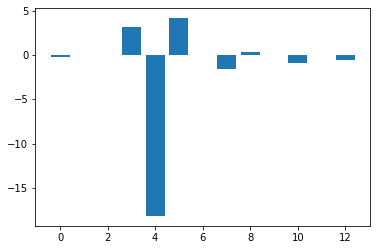

Feature:  0       CRIM, Score: -0.15441
Feature:  1         ZN, Score: 0.05778
Feature:  2      INDUS, Score: 0.02670
Feature:  3       CHAS, Score: 3.25146
Feature:  4        NOX, Score: -18.19982
Feature:  5         RM, Score: 4.19592
Feature:  6        AGE, Score: 0.00807
Feature:  7        DIS, Score: -1.60598
Feature:  8        RAD, Score: 0.32551
Feature:  9        TAX, Score: -0.01283
Feature: 10    PTRATIO, Score: -0.90633
Feature: 11          B, Score: 0.01359
Feature: 12      LSTAT, Score: -0.51488


In [51]:
importance = lrc.coef_

plt.bar([x for x in range(len(importance))], importance)
plt.show()

for i,v in enumerate(importance):
	print('Feature: %2d %10s, Score: %.5f' % (i, a.feature_names[i],v))

**После проделанной работы стало ясно, что разные алгоритмы по-разному выявляют важность признаков, что нужно имметь ввиду при выбора алгоритма в будущем**